# Exercise 03 - Grupo 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
plt.style.use('classic')

# 3.1
## Cargue de datos

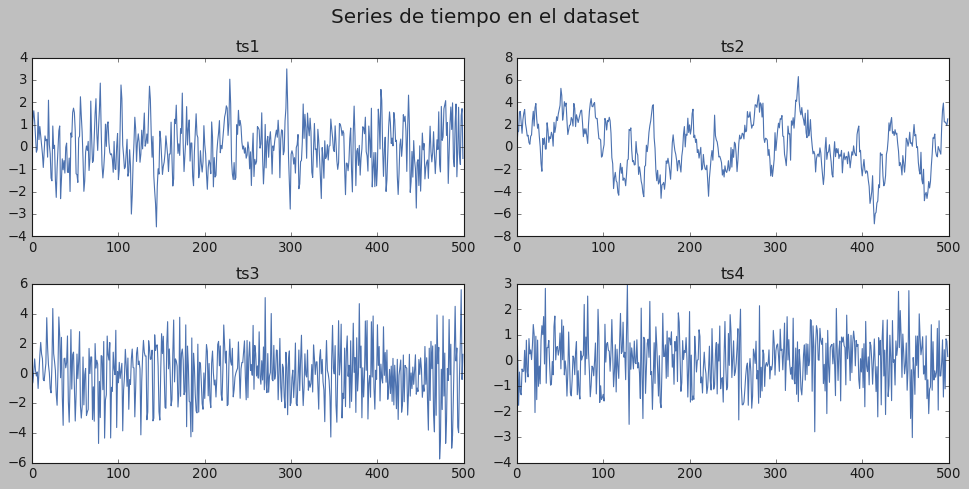

In [2]:
series = pd.read_csv('Datasets/data_arma.csv', header=0 ,index_col=0)
fig, axis=plt.subplots(2,2 ,sharex=False, sharey=False, squeeze=False,constrained_layout=True,
figsize=(12,6))
fig.suptitle('Series de tiempo en el dataset', fontsize=18)
fig.figsize=(12,5)

series[['ts1']].plot(ax=axis[0,0],title='ts1',legend=None)
series[['ts2']].plot(ax=axis[0,1],title='ts2',legend=None)
series[['ts3']].plot(ax=axis[1,0],title='ts3',legend=None)
series[['ts4']].plot(ax=axis[1,1],title='ts4',legend=None);

## Grafico AFC y PAFC Serie 1

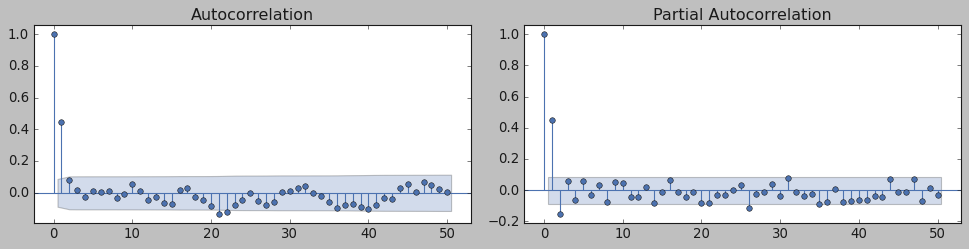

In [3]:
fig, axis=plt.subplots(1,2 ,sharex=False, sharey=False, squeeze=False,constrained_layout=True,
figsize=(12,3))
fig.figsize=(12,5)

plot_acf(series[['ts1']], lags=50,ax=axis[0,0])
plot_pacf(series[['ts1']], lags=50,ax=axis[0,1]);

####  Prueba de estacionariedad

In [4]:
result = adfuller(series['ts1'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -13.634560
p-value: 0.000000


Según el grafico de AFC se muestra que los dos primeros rezagos están por fuera de las bandas con lo cual sugiera que el proceso de la serie 1 sea un promedio móvil de orden 2, es decir un **MA(2)**, de otro lado el grafico PACF sugiere que el parámetro del modelo autorregresivo es de orden 0, esto es un **AR(0)**, de esta manera toda la serie se puede modelar con un modelo **ARMA(2,0)**.

La prueba de estacionariedad sugiere que la serie es estacionaria, al realizar el MSE se observa que **ARMA(2,0)** y  **ARMA(1,0)** tienen valores de MSE similares. Se descarta un valor de **AR**.
## Grafico AFC y PAFC Serie 2

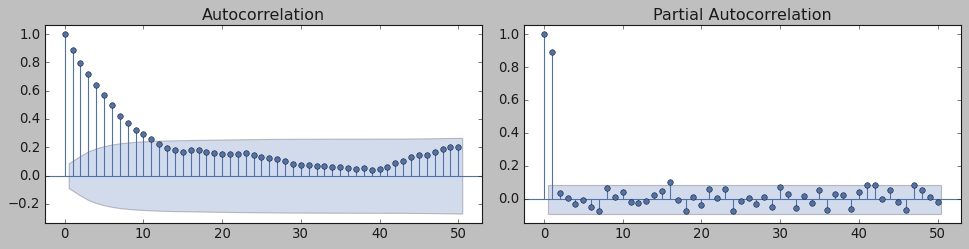

In [5]:
fig, axis=plt.subplots(1,2 ,sharex=False, sharey=False, squeeze=False,constrained_layout=True,
figsize=(12,3))
fig.figsize=(12,5)

plot_acf(series[['ts2']], lags=50,ax=axis[0,0])
plot_pacf(series[['ts2']], lags=50,ax=axis[0,1]);


####  Pruba de estacionariedad

In [6]:
result = adfuller(series['ts2'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.345985
p-value: 0.000004


Según el grafico de AFC se muestra que las autocorrelaciones son significativas hasta el rezago 10, con lo cual sugiera que el proceso de la serie 2 sea un promedio móvil hasta de orden 10, es decir un **MA(10)**, de otro lado el grafico PACF sugiere dos correlaciones significativas con lo cual podría ser un **AR(2)** de orden 2

La prueba de estacionariedad sugiere que la serie es estacionaria, al realizar el MSE se observa que **ARMA(7,0)** tiene valores  MSE más pequeños que considerar un **ARMA(7,2).
## Grafico AFC y PAFC serie 3

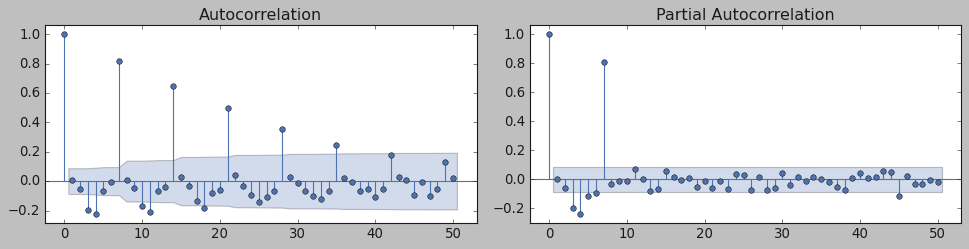

In [7]:
fig, axis=plt.subplots(1,2 ,sharex=False, sharey=False, squeeze=False,constrained_layout=True,
figsize=(12,3))
fig.figsize=(12,5)

plot_acf(series[['ts3']], lags=50,ax=axis[0,0])
plot_pacf(series[['ts3']], lags=50,ax=axis[0,1]);

####  Prueba de estacionariedad

In [8]:
result = adfuller(series['ts4'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -22.943060
p-value: 0.000000


Según el grafico de AFC se muestra autocorrelaciones significativas que sobre salen en el grafico en el séptimo valor, con lo cual sugiera que el proceso de la serie 3 sea un promedio móvil hasta de orden 7, es decir un **MA(7)**, de otro lado el grafico PACF también se muestra que el rezago 7 es significativo con lo cual  **AR(7)** de orden 7

La prueba de estacionariedad sugiere que la serie es estacionaria, al realizar el MSE se observa que **ARMA(7,7)** tiene valores  MSE más pequeños que considerar un **ARMA(1,1)**.
## Grafico AFC y PAFC serie 4

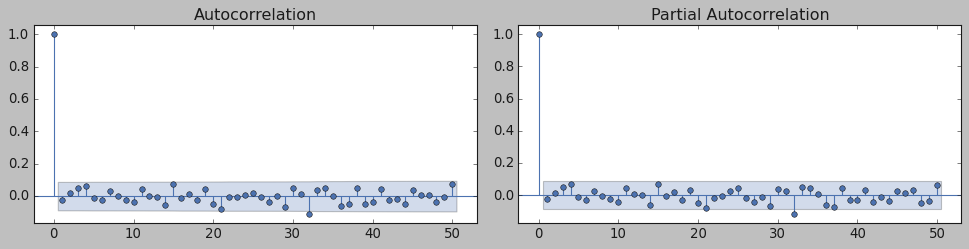

In [9]:
fig, axis=plt.subplots(1,2 ,sharex=False, sharey=False, squeeze=False,constrained_layout=True,
figsize=(12,3))
fig.figsize=(12,5)

plot_acf(series[['ts4']], lags=50,ax=axis[0,0])
plot_pacf(series[['ts4']], lags=50,ax=axis[0,1]);

Se observa que los valores de autocorrelación y auto correlación parcial son muy cercanos a 0 para todos los rezagos, con lo cual podemos suponer que se trata de una serie de ruido blanco.
<br>
<br>
# 3.2
## Cargue de datos
Este dataset contiene las ventas mensuales de una marca de shampoo en una ventana de 3 años.

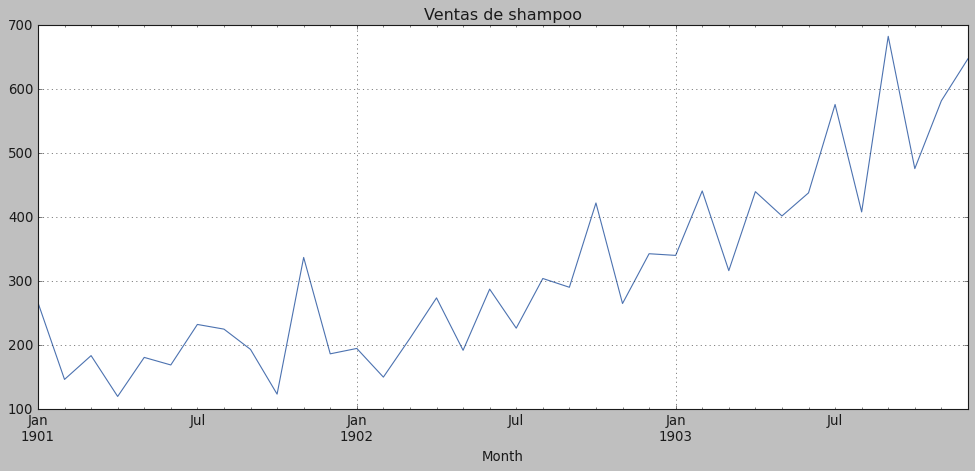

In [10]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv('Datasets/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series.plot(figsize=(15,6), title='Ventas de shampoo', grid=True);

##  Prueba de estacionariedad

In [11]:
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 3.060142
p-value: 1.000000


Con el test se concluye que la serie no es estacionaria, tiene sentido dado que en el grafico se observa la tendencia por lo cual diferenciamos y volvemos a aplicar test de estacionariedad.

ADF Statistic: -7.249074
p-value: 0.000000


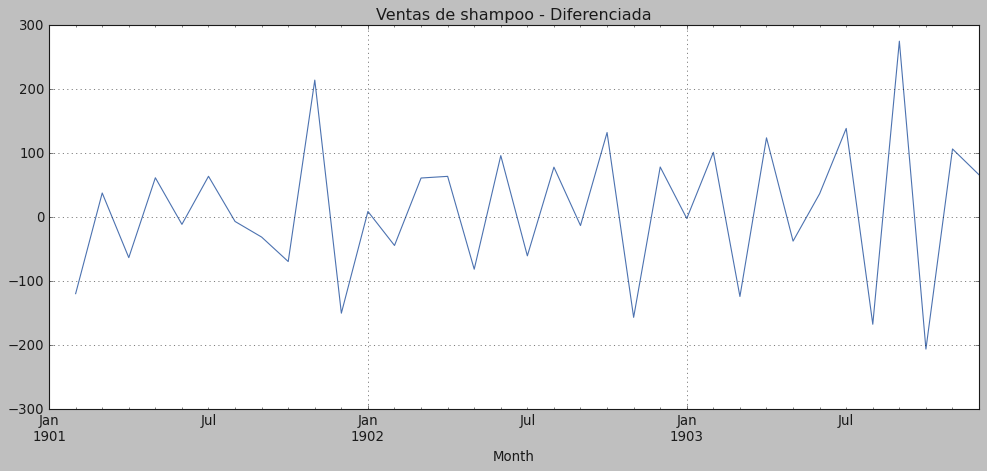

In [12]:
series.diff().plot(figsize=(15,6), title='Ventas de shampoo - Diferenciada', grid=True);
result = adfuller(series.diff().iloc[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

El test confirma que al diferenciar una sola vez la serie se vuelve estacionaria; además observamos que el nuevo grafico ya no presenta tendencia.
Dado que al diferenciar una vez la serie se vuelve estacionaria, el parámetro 'd' se fija como constante y procedemos a probar con varias combinaciones de 'p' y 'q' para identificar aquella de minimice el MSE.

In [13]:
resumen = {'par_p': [-1], 'par_d': [-1],'par_q': [-1],'mse':[100000000]}
resumen = pd.DataFrame(data=resumen)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
future = [x for x in test]
grid = [(0,0),(1,0),(2,0),(3,0),(4,0),(5,0),(6,0),(7,0),(8,0),(9,0),(10,0),(11,0),(0,1),(1,1),(2,1),(3,1),(4,1),(5,1),(6,1),(0,2),(1,2),(2,2),(3,2),(4,2),(5,2),(0,3),(1,3),(0,4),(1,4)]
grid = pd.DataFrame(grid, columns = ['P','Q'])

for i in range(0,grid.shape[0]):
    temp_p,temp_q = grid.iloc[i]
    model = ARIMA(history, order=(temp_p,1,temp_q))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast(steps=len(test))[0]
    yhat = output
    predictions = yhat
    real_values = future
    error = np.round_(mean_squared_error(test, predictions))
    resumen_temp = {'par_p': [temp_p], 'par_d': [1],'par_q': [temp_q],'mse':[error]}
    resumen_temp = pd.DataFrame(data=resumen_temp)
    resumen = pd.concat([resumen,resumen_temp]);

resumen.sort_values(by=['mse']).head()

,par_p,par_d,par_q,mse
0,8,1,0,5173.0
0,11,1,0,9191.0
0,3,1,2,13474.0
0,4,1,2,13577.0
0,7,1,0,14111.0


Encontramos que la combinación de parámetros que minimiza el MSE es **'d'=1**,**'p'=8** y **'q'=0** (Auto regresivo de grado 8 con diferenciación). 

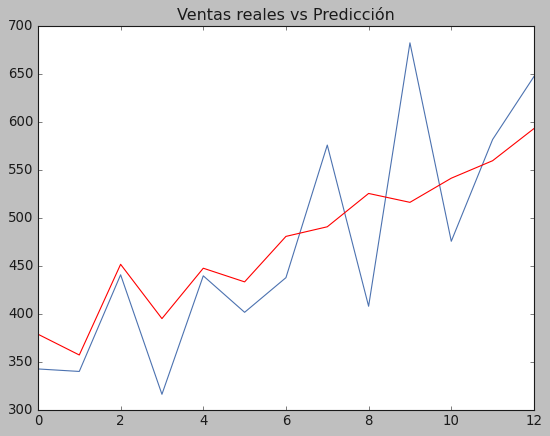

In [14]:
model = ARIMA(history, order=(8,1,0))
model_fit = model.fit(disp=0)
output = model_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future
plt.plot(test)
plt.plot(predictions, color='red')
plt.title('Ventas reales vs Predicción')
plt.show();

Observamos que el modelo definido captura bastante bien el cambio en la tendencia.